In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv('pet_adoption_data.csv')

# 1. Description Statistique de Base
description_stats = df.describe()

In [2]:
# Afficher la description statistique
print("Description Statistique :\n", description_stats)

Description Statistique :
              PetID    AgeMonths     WeightKg   Vaccinated  HealthCondition  \
count  2007.000000  2007.000000  2007.000000  2007.000000      2007.000000   
mean   1503.000000    92.279522    15.705776     0.701046         0.196313   
std     579.515315    52.148363     8.327749     0.457914         0.397307   
min     500.000000     1.000000     1.018198     0.000000         0.000000   
25%    1001.500000    48.000000     8.730396     0.000000         0.000000   
50%    1503.000000    94.000000    15.925416     1.000000         0.000000   
75%    2004.500000   138.000000    22.737180     1.000000         0.000000   
max    2506.000000   179.000000    29.995628     1.000000         1.000000   

       TimeInShelterDays  AdoptionFee  PreviousOwner  AdoptionLikelihood  
count        2007.000000  2007.000000    2007.000000         2007.000000  
mean           43.974091   249.142003       0.301943            0.328351  
std            25.740253   142.887040       0

In [3]:
# 2. Matrice de Corrélation (seulement pour les colonnes numériques)
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
matrice_correlation = df_numeric.corr()

# Afficher la matrice de corrélation
print("\nMatrice de Corrélation :\n", matrice_correlation)


Matrice de Corrélation :
                        PetID  AgeMonths  WeightKg  Vaccinated  \
PetID               1.000000  -0.008464  0.034315    0.008808   
AgeMonths          -0.008464   1.000000 -0.029189   -0.001801   
WeightKg            0.034315  -0.029189  1.000000    0.022526   
Vaccinated          0.008808  -0.001801  0.022526    1.000000   
HealthCondition     0.010486   0.017200  0.000708    0.024079   
TimeInShelterDays   0.017683   0.036837 -0.000980   -0.001123   
AdoptionFee         0.010557  -0.038129 -0.002367    0.021662   
PreviousOwner       0.001339   0.034943 -0.049155   -0.011460   
AdoptionLikelihood  0.049582  -0.202209  0.017601    0.301311   

                    HealthCondition  TimeInShelterDays  AdoptionFee  \
PetID                      0.010486           0.017683     0.010557   
AgeMonths                  0.017200           0.036837    -0.038129   
WeightKg                   0.000708          -0.000980    -0.002367   
Vaccinated                 0.024079   

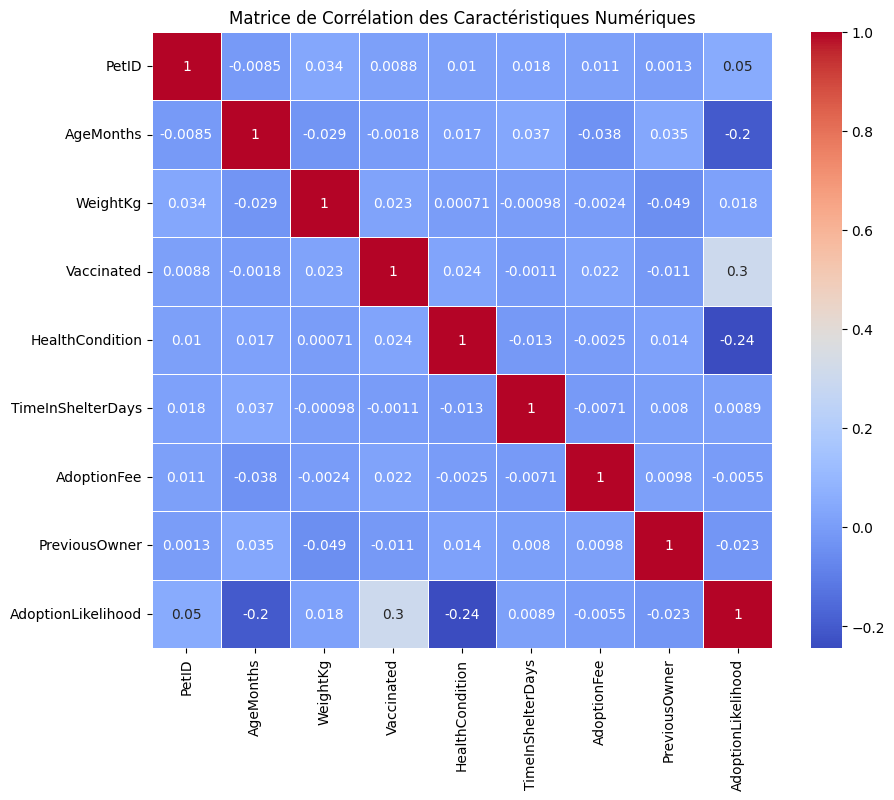

In [4]:
# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Matrice de Corrélation des Caractéristiques Numériques')
plt.show()

In [5]:
# 3. Vérification des valeurs manquantes
valeurs_manquantes = df.isnull().sum()

# Afficher les valeurs manquantes
print("\nValeurs Manquantes :\n", valeurs_manquantes[valeurs_manquantes > 0])


Valeurs Manquantes :
 Series([], dtype: int64)


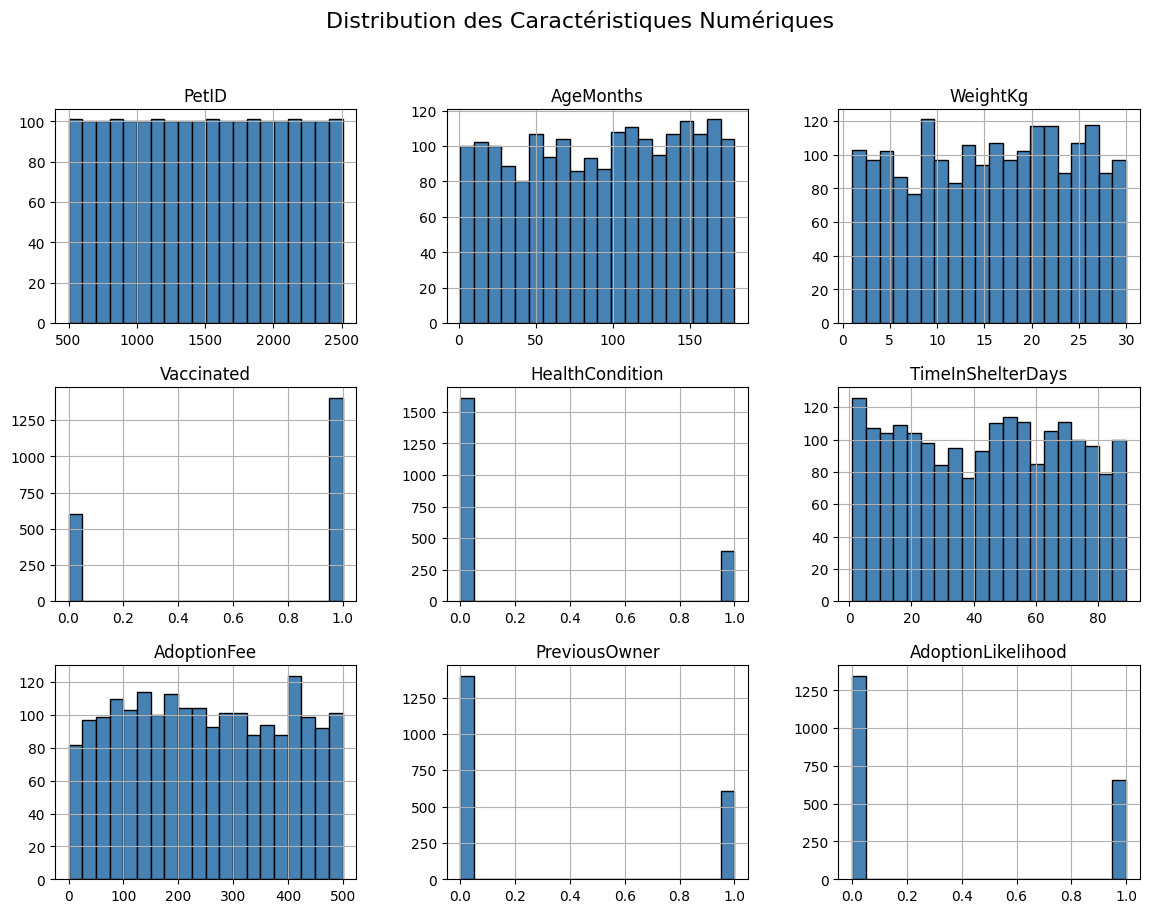

In [6]:
# 4. Distribution (pour la détection des outliers)
# Distribution des variables numériques
df_numeric.hist(bins=20, figsize=(14, 10), color='steelblue', edgecolor='black')
plt.suptitle('Distribution des Caractéristiques Numériques', fontsize=16)
plt.show()

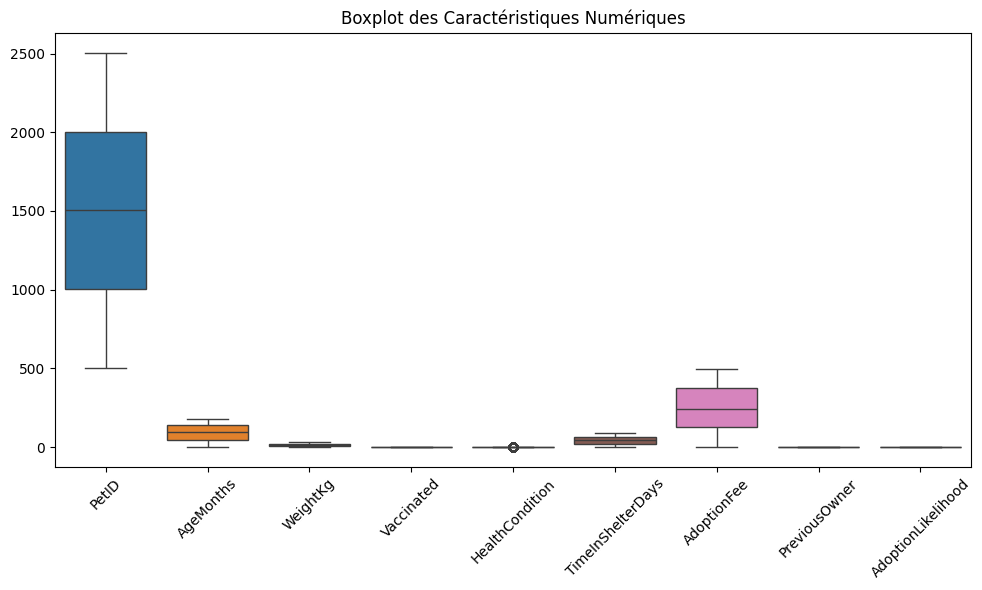

In [7]:
# 5. Boxplot pour détecter les valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric)
plt.title('Boxplot des Caractéristiques Numériques')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

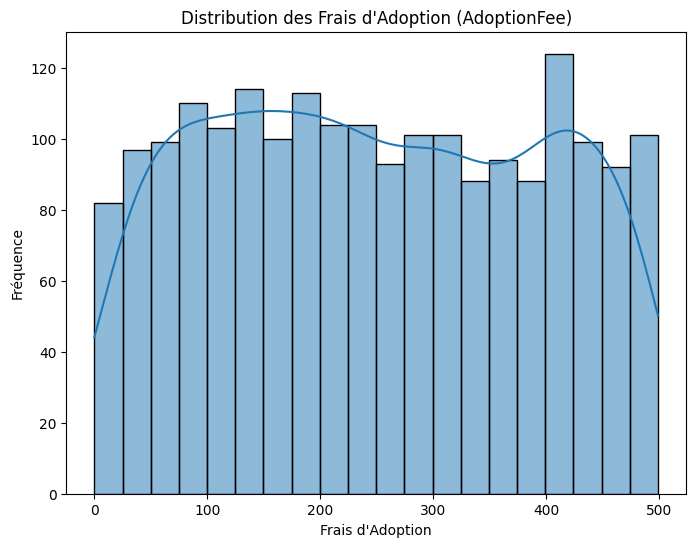

In [8]:
# 6. Distribution d'une Caractéristique Individuelle (optionnel)
plt.figure(figsize=(8, 6))
sns.histplot(df['AdoptionFee'], kde=True, bins=20)
plt.title('Distribution des Frais d\'Adoption (AdoptionFee)')
plt.xlabel('Frais d\'Adoption')
plt.ylabel('Fréquence')
plt.show()